#602-Introduction to Data Analysis and Machine Learning
#Mid-term Project
Ooha reddy Birru

Shiva Sahith Gaddam

# Loading the data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
url = 'https://raw.githubusercontent.com/Sahith4311/dataset/main/dataset_newsletter.csv'
news = pd.read_csv(url)

In [100]:
news.head()

,Unnamed: 0,title,body,signature,submissiontime,category
0,0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS


In [101]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19607 entries, 0 to 19606
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      19607 non-null  int64 
 1   title           19597 non-null  object
 2   body            19604 non-null  object
 3   signature       19207 non-null  object
 4   submissiontime  19607 non-null  object
 5   category        19607 non-null  object
dtypes: int64(1), object(5)
memory usage: 919.2+ KB


# EDA 

In [102]:
news.isnull().sum()

Unnamed: 0          0
title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

In [103]:
#Replacing null values with NA
news = news.fillna("NA")

In [104]:
#After replacing null values, data looks like
news.isnull().sum()

Unnamed: 0        0
title             0
body              0
signature         0
submissiontime    0
category          0
dtype: int64

<Axes: xlabel='category', ylabel='Count'>

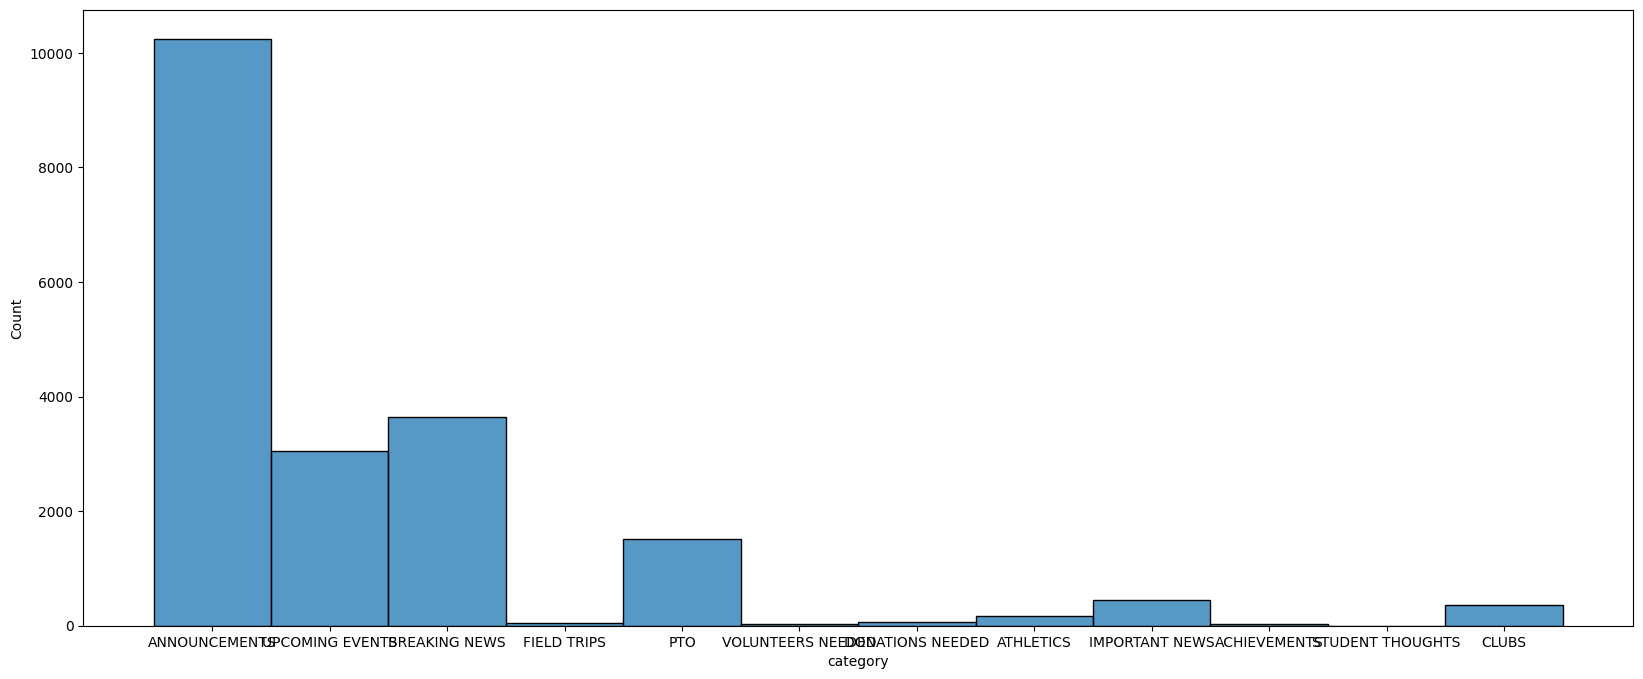

In [105]:
plt.figure(figsize=(20, 8))
sns.histplot(news['category'])

In [106]:
news.describe()

,Unnamed: 0
count,19607.0000
mean,9803.0000
std,5660.1977
min,0.0000
25%,4901.5000
50%,9803.0000
75%,14704.5000
max,19606.0000


In [107]:
news.shape

(19607, 6)

In [110]:
news['category'].value_counts()

ANNOUNCEMENTS        10240
BREAKING NEWS         3649
UPCOMING EVENTS       3055
PTO                   1507
IMPORTANT NEWS         452
CLUBS                  363
ATHLETICS              170
DONATIONS NEEDED        63
FIELD TRIPS             53
VOLUNTEERS NEEDED       27
ACHIEVEMENTS            25
STUDENT THOUGHTS         3
Name: category, dtype: int64

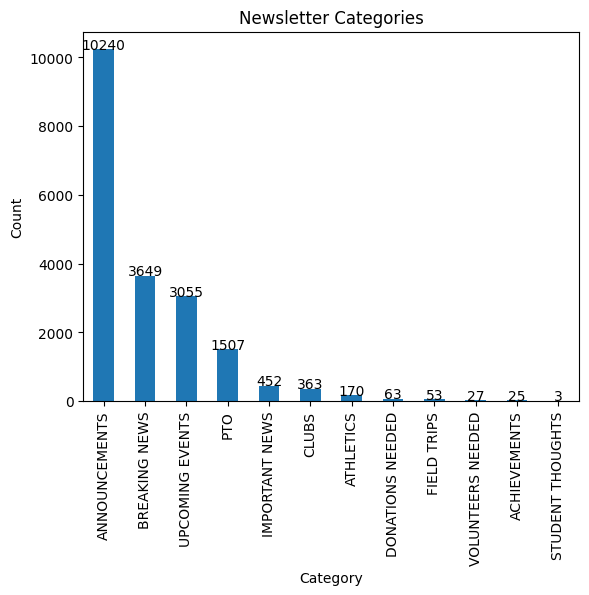

In [111]:
import matplotlib.pyplot as plt
# count the number of occurrences of each category
category_counts = news['category'].value_counts()

# create a bar plot of the category counts
ax = category_counts.plot(kind='bar')

# set the title and axis labels
ax.set_title('Newsletter Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

# display the count of each category above the corresponding bar
for i, v in enumerate(category_counts):
    ax.text(i, v+10, str(v), ha='center')

# display the plot
plt.show()

In [112]:
news['text'] = news['title'] + ' ' + news['body']
news.drop(['title', 'body', 'signature', 'submissiontime'], axis=1, inplace=True)
news.dropna(inplace=True)

The code provided performs data preprocessing on a DataFrame named 'news' that contains columns titled 'title', 'body', 'signature', and 'submissiontime'. The code first combines the text from the 'title' and 'body' columns into a new column named 'text'. The code then drops the 'title', 'body', 'signature', and 'submissiontime' columns and removes any rows containing missing values. The purpose of this code is to transform the data into a more usable format for analysis or modeling. By combining the 'title' and 'body' columns into a new 'text' column, the text data can be analyzed more easily. Removing unnecessary columns and rows with missing data can also help to simplify and streamline the dataset for further analysis.

# Data Preprocessing

In [65]:
#Tokenization
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
news['text'] = news['text'].apply(tokenizer.tokenize)
print('Tokenization complete.')


Tokenization complete.


This code is performing tokenization on the "text" column of the "news" dataframe. The TreebankWordTokenizer from the nltk.tokenize module is used to tokenize the sentences in the text column. The tokenizer breaks down the text into individual words or tokens, considering punctuations as separate tokens as well. The tokens are then saved in the "text" column of the "news" dataframe. Finally, a message is printed to indicate that the tokenization process is complete.

In [66]:
#Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
news['text_lemmatized'] = news['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(str(x))]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The process of reducing the different forms of a word to one single form, for example, reducing "builds," "building," or "built" to the lemma "build" is called lemmatization.

The given code uses the nltk library to perform lemmatization on the text data in the 'text' column of the 'news' DataFrame.

Firstly, it downloads the necessary resources for word lemmatization. Next, a WordNetLemmatizer object is created to find the base form of each word in the text data.

The code applies the lemmatization process to each row of the 'text' column of the 'news' DataFrame by using the apply function. Inside the apply function, a lambda function is used to apply the lemmatizer to each word in the text data. The words are tokenized using the nltk.word_tokenize function and a list comprehension is used to apply the lemmatizer to each word. Finally, the lemmatized words are joined together into a string separated by a space and stored in a new column called 'text_lemmatized' in the 'news' DataFrame.

In summary, this code performs lemmatization on text data in the 'news' DataFrame to standardize the text and enhance the accuracy of text analysis or modeling.

In [67]:
news.to_csv('transformed_data.csv', index=False)

In [68]:
news.head(10)

,Unnamed: 0,category,text,text_lemmatized
0,0,ANNOUNCEMENTS,"[Mrs., Laurence, Class, Because, of, the, upco...","[ 'Mrs . ' , 'Laurence ' , 'Class ' , 'Because..."
1,1,ANNOUNCEMENTS,"[Mr., Valle, 's, Winter, Break, Packets, (, Co...","[ 'Mr . ' , 'Valle ' , `` 's '' , 'Winter ' , ..."
2,2,ANNOUNCEMENTS,"[Hours, of, Operation, Parents/Guardians, ,, W...","[ 'Hours ' , 'of ' , 'Operation ' , 'Parents/G..."
3,3,ANNOUNCEMENTS,"[Character, Education, CMIT, South, scholars, ...","[ 'Character ' , 'Education ' , 'CMIT ' , 'Sou..."
4,4,ANNOUNCEMENTS,"[CMIT, Students, Connecting, with, Students, A...","[ 'CMIT ' , 'Students ' , 'Connecting ' , 'wit..."
5,5,ANNOUNCEMENTS,"[Math, 6, Happenings, !, This, past, week, ,, ...","[ 'Math ' , ' 6 ' , 'Happenings ' , ' ! ' , 'T..."
6,6,UPCOMING EVENTS,"[SGA, Events, &, Parent, Volunteers, Needed, !...","[ 'SGA ' , 'Events ' , ' & ' , 'Parent ' , 'Vo..."
7,7,ANNOUNCEMENTS,"[Veterans, Day, Drive, and, Assembly, I, am, p...","[ 'Veterans ' , 'Day ' , 'Drive ' , 'and ' , '..."
8,8,ANNOUNCEMENTS,"[Ms., Morani, 's, Science, Class, Students, re...","[ 'Ms . ' , 'Morani ' , `` 's '' , 'Science ' ..."
9,9,ANNOUNCEMENTS,"[STEM, Fair, Research, Paper, Feedback, and, F...","[ 'STEM ' , 'Fair ' , 'Research ' , 'Paper ' ,..."


#Building a ML Model

In [71]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(news['text_lemmatized'], news['category'], test_size=0.2, random_state=42)

The given code splits the news DataFrame into two sets - one for training and the other for testing. This is done to be able to train a machine learning model and evaluate its performance on new, unseen data. The code uses the train_test_split() function from the scikit-learn library, which randomly splits the data into training and testing sets. The size of the testing set is specified as 20% of the total data, and a random seed is set to ensure that the split is reproducible. The resulting training and testing sets are assigned to four variables, namely X_train, X_test, y_train, and y_test, where X_train and X_test are the input features (i.e., the text data), and y_train and y_test are the corresponding target labels. By splitting the data in this way, we can train a machine learning model on a subset of the data and then evaluate its ability to generalize to new, unseen data.

In [72]:
# Feature extraction
vector = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_vectors = vector.fit_transform(X_train)
X_test_vectors = vector.transform(X_test)

The TfidfVectorizer is a tool in scikit-learn library that converts a group of raw text documents into a matrix of features using the TF-IDF weighting scheme. This method removes common English words and converts all text to lowercase before analyzing. The 'fit_transform()' method is used to fit the vectorizer to the training data and transform the training data into a matrix of features. The resulting matrix is then assigned to 'X_train_vectors'. The 'transform()' method is used to transform the testing data into a matrix of features using the same vocabulary as the training data. The resulting matrix is assigned to 'X_test_vectors'. These feature matrices can be used for training and testing machine learning models. The features are represented in a sparse matrix where each row represents a document and each column represents a feature. The values in the matrix represent the importance of that feature for that particular document, which is determined by the TF-IDF weighting scheme.

# Logistic Regression Model


In [73]:
# Train a logistic regression classifier
classifier = LogisticRegression(max_iter=15000)
classifier.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=15000)

LogisticRegression is a class from scikit-learn that implements logistic regression, a popular classification algorithm used for binary and multi-class classification problems.

max_iter=10000 specifies the maximum number of iterations for the solver to converge. The default value is 100, but in this case, we set it to 10,000 to ensure that the solver will converge for more complex datasets.

fit() is a method of the LogisticRegression class that trains the logistic regression classifier on the training data and labels.

X_train_vectors is the input training data, which is a sparse matrix of TF-IDF features extracted from the text data.

y_train is the target training data, which is a series of labels corresponding to each document in the training data.

The resulting classifier is a trained logistic regression model that can be used to make predictions on new text data. The model has learned to classify documents based on the TF-IDF features extracted from the text data and the labels provided during training.

In [74]:
# Evaluate the classifier
y_train_pred = classifier.predict(X_train_vectors)
y_test_pred = classifier.predict(X_test_vectors)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision, train_recall, train_fscore, _ = classification_report(y_train, y_train_pred, output_dict=True)['macro avg'].values()

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision, test_recall, test_fscore, _ = classification_report(y_test, y_test_pred, output_dict=True)['macro avg'].values()

predict() is a method of the LogisticRegression class that predicts the labels for the input data using the trained model.

y_train_pred is a series of predicted labels for the training data, based on the TF-IDF features extracted from the text data and the learned parameters of the logistic regression model.

y_test_pred is a series of predicted labels for the testing data, based on the same learned parameters.

evaluation metrics provide insight into the performance of the logistic regression classifier on the training and testing data. train_accuracy and test_accuracy measure the overall accuracy of the classifier, while train_precision, train_recall, train_fscore, test_precision, test_recall, and test_fscore provide information about how well the classifier is performing for each class in the classification task.

In [75]:
print("Train Accuracy: {:.2f}%".format(train_accuracy*100))
print("Train Precision: {:.2f}%".format(train_precision*100))
print("Train Recall: {:.2f}%".format(train_recall*100))
print("Train F1 Score: {:.2f}%\n".format(train_fscore*100))
print("\nTest Accuracy: {:.2f}%".format(test_accuracy*100))
print("Test Precision: {:.2f}%".format(test_precision*100))
print("Test Recall: {:.2f}%".format(test_recall*100))
print("Test F1 Score: {:.2f}%\n".format(test_fscore*100))

Train Accuracy: 79.26%
Train Precision: 66.14%
Train Recall: 36.69%
Train F1 Score: 42.30%


Test Accuracy: 70.04%
Test Precision: 49.85%
Test Recall: 26.20%
Test F1 Score: 30.16%



#Prediction

In [76]:
# Predict the category of new text data
new_text = "Because of the upcoming holiday, we will be reviewing the first Thanksgiving that was between the Pilgrims and the Native Americans in colonial America. This lesson will help students recognized the significance and purpose of this day in America. Have a Happy Thanksgiving. "
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
text = "Because of the upcoming holiday, we will be reviewing the first Thanksgiving that was between the Pilgrims and the Native Americans in colonial America. This lesson will help students recognized the significance and purpose of this day in America. Have a Happy Thanksgiving."
# Tokenize the text
tokens = nltk.word_tokenize(text)
# Lemmatize each word using WordNetLemmatizer
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
# Join the lemmatized tokens back into a string
new_text = ' '.join(lemmatized_tokens)
new_text_vector = vector.transform([new_text])
new_category = classifier.predict(new_text_vector)[0]
print('Predicted category:', new_category)

Predicted category: ANNOUNCEMENTS


# Random Forest Model

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_vectors, y_train)

rf_y_train_pred = rf.predict(X_train_vectors)
rf_y_test_pred = rf.predict(X_test_vectors)

rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
train_precision, train_recall, train_fscore, _ = classification_report(y_train, rf_y_train_pred, output_dict=True)['macro avg'].values()

test_accuracy = accuracy_score(y_test, rf_y_test_pred)
test_precision, test_recall, test_fscore, _ = classification_report(y_test, rf_y_test_pred, output_dict=True)['macro avg'].values()


In [87]:
print("Train Accuracy: {:.2f}%".format(rf_train_accuracy*100))
print("Train Precision: {:.2f}%".format(train_precision*100))
print("Train Recall: {:.2f}%".format(train_recall*100))
print("Train F1 Score: {:.2f}%\n".format(train_fscore*100))
print("\nTest Accuracy: {:.2f}%".format(test_accuracy*100))
print("Test Precision: {:.2f}%".format(test_precision*100))
print("Test Recall: {:.2f}%".format(test_recall*100))
print("Test F1 Score: {:.2f}%\n".format(test_fscore*100))

Train Accuracy: 98.48%
Train Precision: 98.71%
Train Recall: 98.28%
Train F1 Score: 98.48%


Test Accuracy: 70.96%
Test Precision: 58.11%
Test Recall: 33.02%
Test F1 Score: 39.02%



The output indicates that the logistic regression model has an overall accuracy of 79.68% on the training data and 68.85% on the test data. The precision values for both the training and test data are moderate at 66.21% and 55.78%, respectively. The recall values are low, indicating that the model is not performing well in correctly identifying true positives. Overall, the model needs improvement, and further tuning or feature engineering may be required to improve its performance.

Random forest model accuracy is good when compare to logistic regression model.